In [3]:
#https://www.statology.org/scree-plot-python/
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("D:/Hanze_Groningen/STAGE/NEW PLAN/chr1_23130.tsv", sep='\t')
df.drop(['Unnamed: 0', '1:0-0', 'donor_id'], axis=1, inplace=True)
labels = {"Uterus" : 1,
             "Gall Bladder" : 2,
             "Blood" : 3,
             "Colorectal" : 4,
             "Cervix" : 5,
             "Ovary" : 6,
             "Nervous system" : 7,
             "Bone" : 8,
             "Head and neck" : 9,
             "Bladder" : 10,
             "Kidney" : 11,
             "Breast" : 12,
             "Brain" : 13,
             "Stomach" : 14}
df["cancer"] = df["cancer"].map(labels)
df.head()
# Setting the label and the feature columns
y = df.loc[:,'cancer'].values
x = df.iloc[:,:-1].values
scaled_df = StandardScaler().fit_transform(x)

In [11]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA() #n_components=4

#fit PCA model to data
pca_fit = pca.fit(scaled_df)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[1. 0. 0. 0. 0.]
[49.02040392  0.          0.          0.          0.        ]


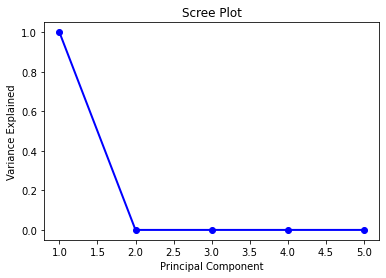

[1. 0. 0. 0. 0.]


In [8]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(pca.explained_variance_ratio_)

In [29]:
#https://umap-learn.readthedocs.io/en/latest/basic_usage.html
df = pd.read_csv("D:/Hanze_Groningen/STAGE/NEW PLAN/chr1_23130.tsv", sep='\t')
df.drop(['Unnamed: 0', '1:0-0', 'donor_id'], axis=1, inplace=True)
labels = {"Uterus" : 1,
             "Gall Bladder" : 2,
             "Blood" : 3,
             "Colorectal" : 4,
             "Cervix" : 5,
             "Ovary" : 6,
             "Nervous system" : 7,
             "Bone" : 8,
             "Head and neck" : 9,
             "Bladder" : 10,
             "Kidney" : 11,
             "Breast" : 12,
             "Brain" : 13,
             "Stomach" : 14}
# df["cancer"] = df["cancer"].map(labels)
df.head()
# Setting the label and the feature columns
y = df.loc[:,'cancer'].values
x = df.iloc[:,:-1].values
scaled_df = StandardScaler().fit_transform(x)

In [30]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [31]:
df.cancer.value_counts()

Breast            777
Blood             513
Kidney            318
Bone              162
Ovary             135
Head and neck     117
Colorectal         90
Uterus             71
Gall Bladder       71
Brain              41
Stomach            37
Nervous system     28
Bladder            23
Cervix             20
Name: cancer, dtype: int64

C:\Users\Anne_\Anaconda3\envs\umap\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Anne_\Anaconda3\envs\umap\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Anne_\Anaconda3\envs\umap\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Anne_\Anaconda3\envs\umap\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Anne_\Anaconda3\envs\umap\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Anne_\Anaconda3\envs\umap\lib\site-packages\seaborn\distributions.py:305: UserWarning:

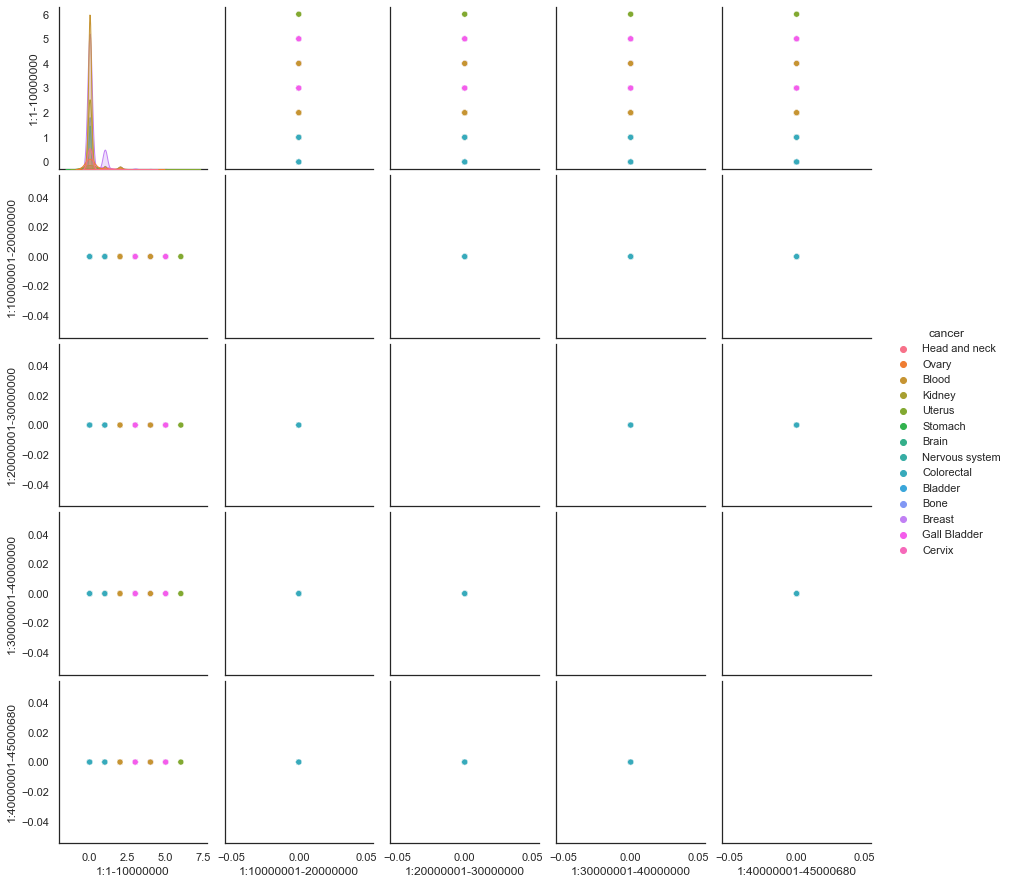

In [32]:
sns.pairplot(df, hue='cancer')

In [33]:
import umap
reducer = umap.UMAP()

In [34]:
embedding = reducer.fit_transform(scaled_df)
embedding.shape

(2403, 2)

In [37]:
df["color"] = df["cancer"].map(labels)

Text(0.5, 1.0, 'UMAP projection of the dataset')

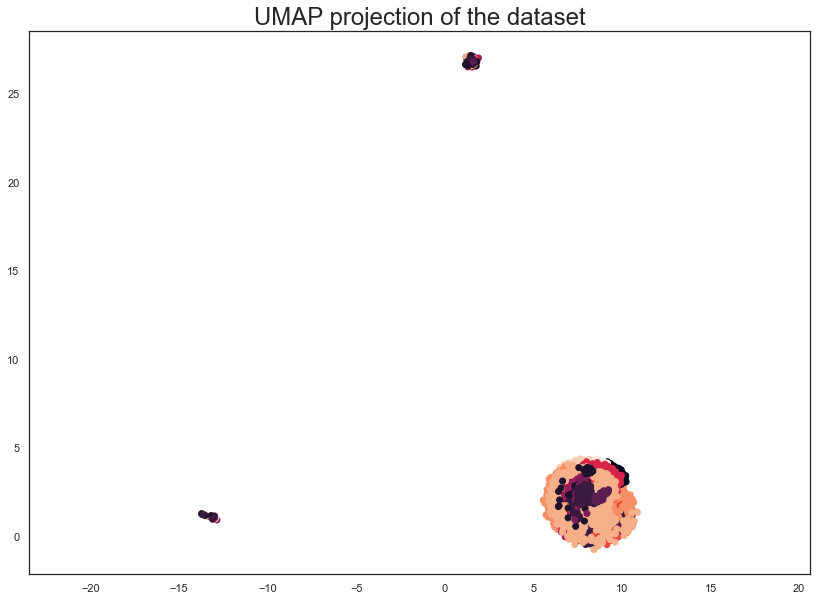

In [43]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=df.color)#[sns.color_palette()[x] for x in df["cancer"].map(labels)] #cmap='Spectral', s=5
plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the dataset', fontsize=24)